In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/aishwaryaagarwal/Documents/Data Science/Projects/Anomaly Detection System for Financial Audits/audit_data.csv'
audit_data = pd.read_csv(file_path)

# Check for null values and data types
print("Null Values:\n", audit_data.isnull().sum())
print("\nData Types:\n", audit_data.dtypes)

Null Values:
 Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

Data Types:
 Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PRO

In [ ]:
#Feature Engineering - feature selection and normalization

In [2]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for the model
features = ['Sector_score', 'Score_A', 'Risk_A', 'Score_B', 'Risk_B', 'TOTAL', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk']

# Check if the selected features exist in the dataframe
missing_features = [feature for feature in features if feature not in audit_data.columns]
if missing_features:
    print(f"Missing features: {missing_features}")
else:
    X = audit_data[features]

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

In [ ]:
#Model Training and anomaly detection

In [3]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model to the scaled data
model.fit(X_scaled)

# Predict anomalies
audit_data['anomaly'] = model.predict(X_scaled)

# Map -1 to anomalies and 1 to normal points
audit_data['anomaly'] = audit_data['anomaly'].map({1: 0, -1: 1})

# Filter out the anomalies
anomalies = audit_data[audit_data['anomaly'] == 1]

# Print anomalies for verification
print(anomalies)

     Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A   PARA_B  Score_B  \
81           3.89           2   71.48      0.6  42.888    25.63      0.6   
241          2.72           2    4.28      0.6   2.568  1264.63      0.6   
342          1.99           2   57.03      0.6  34.218   134.33      0.6   
486          2.37           2   17.53      0.6  10.518     0.00      0.2   
494         15.56           2   20.65      0.6  12.390     0.00      0.2   
509         21.61           9   85.00      0.6  51.000     1.06      0.4   
583         55.57           2    2.59      0.6   1.554   111.90      0.6   
584         55.57           2    6.48      0.6   3.888    43.08      0.6   

      Risk_B    TOTAL  numbers  ...  History  Prob  Risk_F  Score  \
81    15.378    97.11      5.0  ...        0   0.2     0.0    4.0   
241  758.778  1268.91      5.5  ...        2   0.6     1.2    5.2   
342   80.598   191.36      5.0  ...        0   0.2     0.0    4.0   
486    0.000    17.53      6.5  ...    

In [ ]:
#visualization

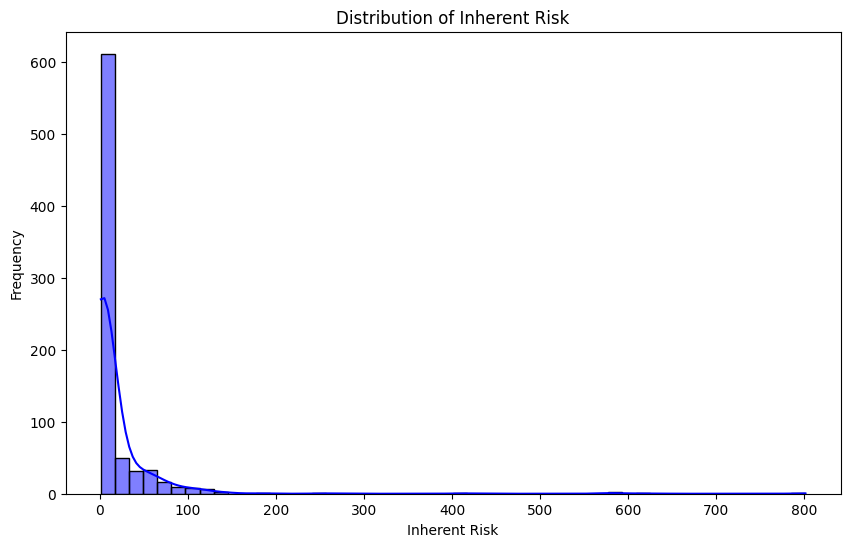

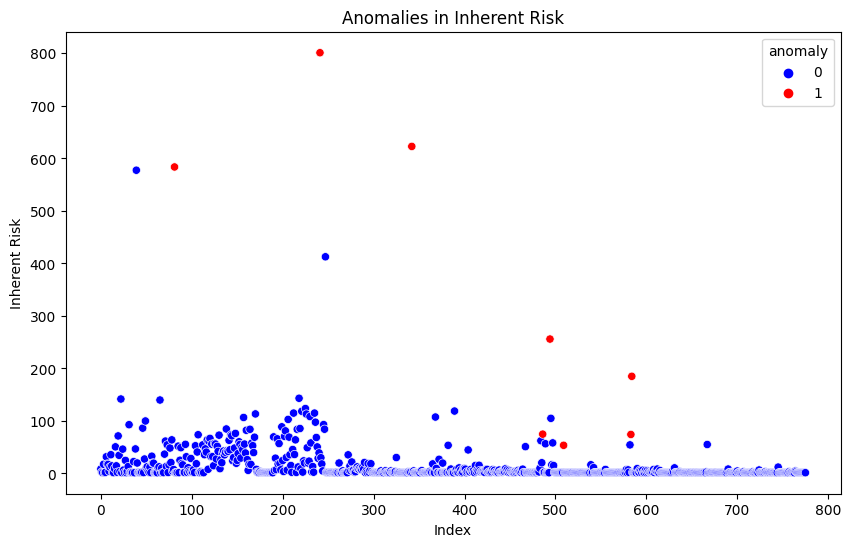

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Inherent Risk
plt.figure(figsize=(10, 6))
sns.histplot(audit_data['Inherent_Risk'], bins=50, kde=True, color='blue')
plt.title('Distribution of Inherent Risk')
plt.xlabel('Inherent Risk')
plt.ylabel('Frequency')
plt.show()

# Anomalies in Inherent Risk
plt.figure(figsize=(10, 6))
sns.scatterplot(x=audit_data.index, y='Inherent_Risk', data=audit_data, hue='anomaly', palette=['blue', 'red'])
plt.title('Anomalies in Inherent Risk')
plt.xlabel('Index')
plt.ylabel('Inherent Risk')
plt.show()